In [2]:
# Heart Disease Classification with Decision Trees and Random Forests

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:

# Load dataset
df = pd.read_csv("heart.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


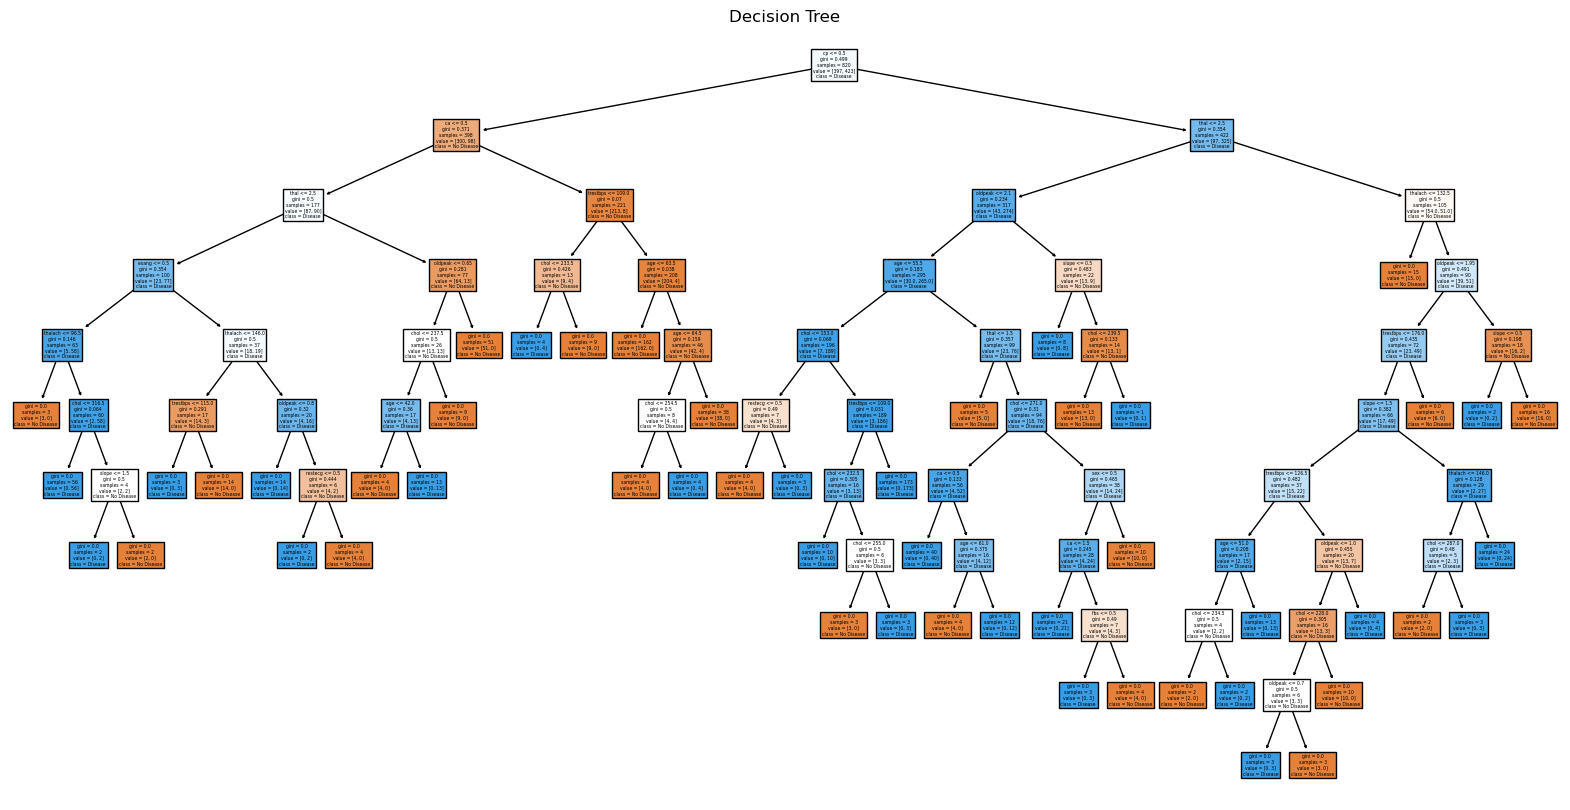

In [4]:

# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree")
plt.show()


In [5]:

# 2. Overfitting Analysis
print("Overfitting Analysis:")
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))
    print(f"Depth {depth}: Train Accuracy = {train_acc:.2f}, Test Accuracy = {test_acc:.2f}")


Overfitting Analysis:
Depth 1: Train Accuracy = 0.76, Test Accuracy = 0.75
Depth 2: Train Accuracy = 0.77, Test Accuracy = 0.68
Depth 3: Train Accuracy = 0.85, Test Accuracy = 0.78
Depth 4: Train Accuracy = 0.88, Test Accuracy = 0.80
Depth 5: Train Accuracy = 0.93, Test Accuracy = 0.84
Depth 6: Train Accuracy = 0.95, Test Accuracy = 0.88
Depth 7: Train Accuracy = 0.97, Test Accuracy = 0.92
Depth 8: Train Accuracy = 0.99, Test Accuracy = 0.98
Depth 9: Train Accuracy = 1.00, Test Accuracy = 0.98
Depth 10: Train Accuracy = 1.00, Test Accuracy = 0.99


In [6]:

# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.99


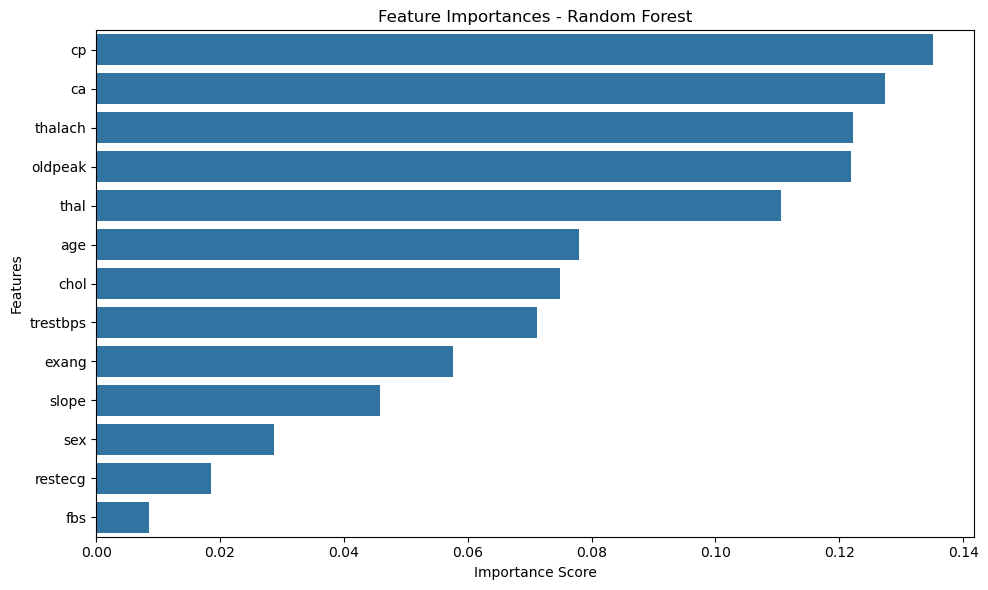

In [7]:

# 4. Feature Importances
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=features, y=features.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [8]:

# 5. Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy: %.2f (+/- %.2f)" % (cv_scores.mean(), cv_scores.std()))


Cross-Validation Accuracy: 1.00 (+/- 0.01)
